In [1]:
import NNMFit
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from scipy.interpolate import interp1d
from scipy.optimize import root_scalar


In [4]:
import matplotlib.font_manager as font_manager
font_axis_label = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 22,
        }
font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }
font_legend = font_manager.FontProperties(family='serif',
                                   weight='normal',
                                   style='normal', size=13)

plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.family':'serif'})

In [5]:
plotting_path = "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/plots/output/bump"
data_path = "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/bump"
data_benchmark_path = "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/naab_ganster_override"

In [11]:
scan_dir_dict = {
                 ### Fitting the bump
                 "SPL" : f"{data_path}/track_cscd_emptyICC_bump_SPL", # no  he event 
                 "BPL" : f"{data_path}/track_cscd_emptyICC_bump_BPL",

                 "SPL_he" : f"{data_path}/track_cscd_he_nominal_emptyICC_bump_SPL", # with he event
                 "BPL_he" : f"{data_path}/track_cscd_he_nominal_emptyICC_bump_BPL",

                 ### not fitting the bump with new environment
                 "SPL_bench" : f"{data_path}/track_cscd_emptyICC_SPL", # no he event
                 "BPL_bench" : f"{data_path}/track_cscd_emptyICC_BPL",

                 "SPL_he_bench" : f"{data_path}/track_cscd_he_nominal_emptyICC_SPL", # with he event
                 "BPL_he_bench" : f"{data_path}/track_cscd_he_nominal_emptyICC_BPL",

                 ### not fitting the bump, with old environment
                 "SPL_bench_2" : f"{data_benchmark_path}/track_cscd_emptyICC_SPL", # no he event
                 "BPL_bench_2" : f"{data_benchmark_path}/track_cscd_emptyICC_BPL",

                 "SPL_he_bench_2" : f"{data_benchmark_path}/track_cscd_he_nominal_emptyICC_SPL", # with he event
                 "BPL_he_bench_2" : f"{data_benchmark_path}/track_cscd_he_nominal_emptyICC_BPL",

                 # fixed alpha
                 "SPL_he_fixedAlpha" : f"{data_path}/track_cscd_he_nominal_emptyICC_bump_fixedAlpha_SPL", # with he event
                 "BPL_he_fixedAlpha" : f"{data_path}/track_cscd_he_nominal_emptyICC_bump_fixedAlpha_BPL",

                 # fixed alpha
                 "SPL_he_fixedAlpha1" : f"{data_path}/track_cscd_he_nominal_emptyICC_bump_fixedAlpha1_SPL", # with he event
                 "BPL_he_fixedAlpha1" : f"{data_path}/track_cscd_he_nominal_emptyICC_bump_fixedAlpha1_BPL",


                 }

In [12]:
drop_unsuccessful = True

scan_dict = {}

bestfits = {}

for name, scan_dir in scan_dir_dict.items():
    print(name)
    # use force_read if new scan points are produced
    scan_dict[name] = NNMFit.utilities.ScanHandler(scan_dir,dump=False,drop_unsuccessful=drop_unsuccessful)

    bestfits[name] = scan_dict[name].get_freefit(drop_unsuccessful="True")



SPL
BPL
SPL_he
BPL_he
SPL_bench
BPL_bench
SPL_he_bench
BPL_he_bench
SPL_bench_2
BPL_bench_2
SPL_he_bench_2
BPL_he_bench_2
SPL_he_fixedAlpha
BPL_he_fixedAlpha
SPL_he_fixedAlpha1
BPL_he_fixedAlpha1


In [20]:
def compare_fits( name1, name2, parameter, bins = 20, bin_low = -6, bin_high = -5.0 ):

    binning = np.linspace(bin_low,bin_high,bins+1)

    bestfit1 = bestfits[name1][parameter]
    bestfit2 = bestfits[name2][parameter]

    fig, (ax) = plt.subplots(1, 1)

    ax.hist( scan_dict[name1].get_raw_df().loc["freefit"][parameter], bins = binning, color = "blue", label = name1, alpha = 0.3 )
    ax.hist( scan_dict[name2].get_raw_df().loc["freefit"][parameter], bins = binning, color = "red", label = name2, alpha = 0.3 )
    
    ax.axvline(bestfit1, color="blue", linestyle="--", label=f"Bestfit {bestfit1:.3f},")
    ax.axvline(bestfit2, color="red", linestyle="--", label=f"Bestfit {bestfit2:.3f}")

    ax.set_title(f"Comparing {name1} and {name2}")

    ax.set_xlabel(parameter)
    ax.set_ylabel("Number of hits")

    ax.legend()
    plt.savefig(f"{plotting_path}/compare_fits_{name1}-{name1}_parameter-{parameter}.pdf")

### normal parameters
# compare_fits("SPL", "SPL_he", "astro_norm", bins = 20, bin_low = 1.75, bin_high = 1.85)
# compare_fits("SPL", "SPL_he", "gamma_astro", bins = 20, bin_low = 2.50, bin_high = 2.54)

# compare_fits("BPL", "BPL_he", "astro_norm", bins = 20, bin_low = 1.75, bin_high = 1.85)
# compare_fits("BPL", "BPL_he", "e_break", bins = 20, bin_low = 4, bin_high = 5)
# compare_fits("BPL", "BPL_he", "gamma_1", bins = 20, bin_low = 1.2, bin_high = 1.4)
# compare_fits("BPL", "BPL_he", "gamma_2", bins = 20, bin_low = 2.6, bin_high = 2.9)

### bump parameters
# compare_fits("SPL", "SPL_he", "bump_norm", bins = 20, bin_low = -6, bin_high = -2.0)
# compare_fits("BPL", "BPL_he", "bump_norm", bins = 20, bin_low = -6, bin_high = -2.0)

# compare_fits("SPL", "SPL_he", "bump_energy", bins = 20, bin_low = 5, bin_high = 10)
# compare_fits("BPL", "BPL_he", "bump_energy", bins = 20, bin_low = 5, bin_high = 10)

# compare_fits("SPL", "SPL_he", "alpha", bins = 20, bin_low = 0.05, bin_high = 5)
# compare_fits("BPL", "BPL_he", "alpha", bins = 20, bin_low = 0.05, bin_high = 5)

### fixed alpha
# compare_fits("SPL_he", "SPL_he_fixedAlpha", "bump_norm", bins = 20, bin_low = -6, bin_high = -2.0)
# compare_fits("BPL_he", "BPL_he_fixedAlpha", "bump_norm", bins = 20, bin_low = -6, bin_high = -2.0)

# compare_fits("SPL_he", "SPL_he_fixedAlpha", "bump_energy", bins = 20, bin_low = 5, bin_high = 10)
# compare_fits("BPL_he", "BPL_he_fixedAlpha", "bump_energy", bins = 20, bin_low = 5, bin_high = 10)

# compare_fits("SPL_he", "SPL_he_fixedAlpha", "alpha", bins = 20, bin_low = 0.05, bin_high = 5)
# compare_fits("BPL_he", "BPL_he_fixedAlpha", "alpha", bins = 20, bin_low = 0.05, bin_high = 5)



In [21]:
def obtain_fitlist( name, parameters ):

    result =  f'{scan_dict[name].get_raw_df().loc["freefit"][parameters]}\n'

    result+=20*"-" + "\n"

    result+= f"{bestfits[name][parameters]}"
    return result

print( obtain_fitlist( "SPL_he", ["astro_norm", "gamma_astro", "bump_norm", "bump_energy", "alpha", "llh"] ) )
print( obtain_fitlist( "SPL_he_fixedAlpha", ["astro_norm", "gamma_astro", "bump_norm", "bump_energy", "alpha", "llh"] ) )

# print( obtain_fitlist( "BPL_he", ["astro_norm", "e_break", "gamma_1", "gamma_2", "bump_norm", "bump_energy", "alpha", "llh"] ) )
# print( obtain_fitlist( "BPL_he_fixedAlpha", ["astro_norm", "e_break", "gamma_1", "gamma_2", "bump_norm", "bump_energy", "alpha", "llh"] ) )



   astro_norm  gamma_astro  bump_norm  bump_energy     alpha          llh
0    1.812399     2.511571  -5.999999          5.5       5.0  3608.818312
1    1.812401     2.511571       -6.0          5.5  4.999999  3608.818312
2     1.79173     2.523013  -5.714993     7.988423       5.0  3606.690548
3     1.79173     2.523013  -5.714993     7.988422       5.0  3606.690548
4      1.8124     2.511571   -5.99786     5.500012  4.262631  3608.818315
5    1.812399     2.511571       -6.0          5.5       5.0  3608.818312
6    1.791729     2.523013  -5.714993     7.988422       5.0  3606.690548
7      1.8124     2.511571       -6.0          5.5  4.999999  3608.818312
--------------------
astro_norm        1.791729
gamma_astro       2.523013
bump_norm        -5.714993
bump_energy       7.988422
alpha                  5.0
llh            3606.690548
Name: 6, dtype: Float64
   astro_norm  gamma_astro  bump_norm  bump_energy  alpha          llh
0    1.812401     2.511571   -5.45194     9.999996      

In [22]:

root_1_sigma = 1.0

def find_errors( name ):

    print(5*"-", name)

    parameters = scan_dict[name].get_scan_list()

    for parameter in parameters:

        if parameter == "freefit": continue

        print(parameter)

        # best fit
        print("bestfit", bestfits[name][parameter])

        scan = scan_dict[name].get_scan_df( param_name = parameter, drop_unsuccessful = drop_unsuccessful)

        interpolator_dllh = interp1d(scan[parameter], scan["dllh"], kind='linear', fill_value="extrapolate")

        # Define a function to find the points where dllh = 0.5
        def find_root(value):
            return lambda x: interpolator_dllh(x) - value

        # Solve for points where dllh = 0.5
        roots = []
        for initial_guess in np.linspace(scan[parameter].min(), scan[parameter].max(), 100):
            # print(initial_guess, interpolator_dllh(initial_guess))
            try:
                sol = root_scalar(find_root(root_1_sigma), bracket=[initial_guess, initial_guess + 0.1], method='bisect')
                if sol.converged:
                    roots.append(sol.root)
            except ValueError:
                continue  # Skip intervals where there are no solutions

        # print(roots)

        # Remove duplicate roots that are very close to each other
        threshold = 1e-2  # Define a distance threshold
        unique_roots = []
        for root in roots:
            if not unique_roots or all(abs(root - ur) > threshold for ur in unique_roots):
                unique_roots.append(root)
            
        print(unique_roots)

        print(f"abs diff {abs(unique_roots-bestfits[name][parameter])}")


for name in scan_dir_dict:
    if "2D" in name: continue
    find_errors(name)


----- SPL
alpha
bestfit 4.999999753080012
[]
abs diff []
astro_norm
bestfit 1.7983666949817212
[1.6374716745138747, 1.928390818762031]
abs diff [0.16089502 0.13002412]
bump_energy
bestfit 5.500000040343104
[]
abs diff []
bump_norm
bestfit -5.999999969892033
[]
abs diff []
gamma_astro
bestfit 2.520792152692381
[2.494219298763221, 2.5445477867659934]
abs diff [0.02657285 0.02375563]
----- BPL
alpha
bestfit 4.999999999938063
[2.13701108815294, 2.8794529855498694, 3.75429719301319]
abs diff [2.86298891 2.12054701 1.24570281]
astro_norm
bestfit 1.6419036918605927
[]
abs diff []
bump_energy
bestfit 5.99866166493643
[5.803679290341758, 6.1656855155760155]
abs diff [0.19498237 0.16702385]
bump_norm
bestfit -2.2020099998401275
[]
abs diff []
e_break
bestfit 4.421390338388944
[4.4172917079586025, 4.4672546512126114]
abs diff [0.00409863 0.04586431]
gamma_1
bestfit 1.2991240835716995
[0.5334857620861272, 0.5991062837941517, 1.0365567163922065, 1.4852688217185404]
abs diff [0.76563832 0.7000178  0

[2.7596910599654576, 2.894753717979922, 2.999660626812817]
abs diff [0.10182071 0.03324195 0.13814886]
----- SPL_he
alpha
bestfit 4.999999999967206
[1.6001466018482462, 1.7998537011430022, 4.324800001912808, 4.575200007420788]
abs diff [3.3998534  3.2001463  0.6752     0.42479999]
astro_norm
bestfit 1.7917293063141906
[1.6341673952299365]
abs diff [0.15756191]
bump_energy
bestfit 7.988421976560654
[7.862538474689857]
abs diff [0.1258835]
bump_norm
bestfit -5.714993243789397
[-5.435029425604004, -5.13111986545665]
abs diff [0.27996382 0.58387338]
gamma_astro
bestfit 2.5230128738606457
[2.51235247442869, 2.5295585768238964]
abs diff [0.0106604 0.0065457]
----- BPL_he
alpha
bestfit 4.9999999999967795
[0.5184048901850474, 1.1523238069567014, 2.7287934014937494, 2.875352571018447, 4.927014354777931]
abs diff [4.48159511 3.84767619 2.2712066  2.12464743 0.07298565]
astro_norm
bestfit 1.763176552178013
[1.5848973061189306, 1.9350602889815827]
abs diff [0.17827925 0.17188374]
bump_energy
bestf

In [11]:
def plot_dllh( name, parameter ):

    scan = scan_dict[name].get_scan_df( param_name = parameter, drop_unsuccessful = drop_unsuccessful)

    bestfit = bestfits[name][parameter]

    fig, (ax) = plt.subplots(1, 1)

    ax.plot( scan[parameter], scan["dllh"] )
    ax.axhline(1.0, color="red", linestyle="--", label="dllh = 1.0")
    ax.axvline(bestfit, color="green", linestyle="--", label=f"Bestfit {bestfit:.2f}")

    ax.set_xlabel(parameter)
    ax.set_ylabel("dllh")

    ax.set_title(name)

    # ax.set_ylim( [ min(scan["dllh"]) - 1, min(scan["dllh"]) +5])
    ax.set_ylim( [ -1,5 ])

    ax.legend()

    plt.savefig(f"{plotting_path}/dllh_name-{name}_parameter-{parameter}.pdf")



In [ ]:
for name in scan_dir_dict:
    if "2D" in name: continue
    parameters = scan_dict[name].get_scan_list()
    for parameter in parameters:
        if parameter == "freefit": continue
        plot_dllh( name, parameter )


In [17]:
import scipy.stats as stats


def calculate_sigma(chi2_value, degrees_of_freedom = 3):

    # Calculate the p-value from the chi-squared survival function
    p_value = stats.chi2.sf(chi2_value, degrees_of_freedom)

    # Convert p-value to sigma (number of standard deviations)
    sigma_significance = stats.norm.isf(p_value)

    return sigma_significance

In [23]:
# compare chi2
print(10*"-", "New environment")
print("SPL",-2*(bestfits["SPL"].llh-bestfits["SPL_bench"].llh), calculate_sigma( -2*(bestfits["SPL"].llh-bestfits["SPL_bench"].llh) ) )
print("BPL",-2*(bestfits["BPL"].llh-bestfits["BPL_bench"].llh), calculate_sigma( -2*(bestfits["BPL"].llh-bestfits["BPL_bench"].llh) ) )
print("SPL he",-2*(bestfits["SPL_he"].llh-bestfits["SPL_he_bench"].llh), calculate_sigma( -2*(bestfits["SPL_he"].llh-bestfits["SPL_he_bench"].llh) ) )
print("BPL he",-2*(bestfits["BPL_he"].llh-bestfits["BPL_he_bench"].llh), calculate_sigma( -2*(bestfits["BPL_he"].llh-bestfits["BPL_he_bench"].llh) ) )
# compare to previous bench
print(10*"-", "Old environment")
print("SPL",-2*(bestfits["SPL"].llh-bestfits["SPL_bench_2"].llh), calculate_sigma( -2*(bestfits["SPL"].llh-bestfits["SPL_bench_2"].llh) ) )
print("BPL",-2*(bestfits["BPL"].llh-bestfits["BPL_bench_2"].llh), calculate_sigma( -2*(bestfits["BPL"].llh-bestfits["BPL_bench_2"].llh) ) )
print("SPL he",-2*(bestfits["SPL_he"].llh-bestfits["SPL_he_bench_2"].llh), calculate_sigma( -2*(bestfits["SPL_he"].llh-bestfits["SPL_he_bench_2"].llh) ) )
print("BPL he",-2*(bestfits["BPL_he"].llh-bestfits["BPL_he_bench_2"].llh), calculate_sigma( -2*(bestfits["BPL_he"].llh-bestfits["BPL_he_bench_2"].llh) ) )
# fixed alpha, but SPL seemed messed up with best fit energy at loge = 10
print(10*"-", "Fixed alpha")
print("SPL he",-2*(bestfits["SPL_he_fixedAlpha"].llh-bestfits["SPL_he_bench"].llh), calculate_sigma( -2*(bestfits["SPL_he_fixedAlpha"].llh-bestfits["SPL_he_bench"].llh),2 ) )
print("BPL he",-2*(bestfits["BPL_he_fixedAlpha"].llh-bestfits["BPL_he_bench"].llh), calculate_sigma( -2*(bestfits["BPL_he_fixedAlpha"].llh-bestfits["BPL_he_bench"].llh),2 ) )
# fixed alpha1
print(10*"-", "Fixed alpha1")
print("SPL he",-2*(bestfits["SPL_he_fixedAlpha1"].llh-bestfits["SPL_he_bench"].llh), calculate_sigma( -2*(bestfits["SPL_he_fixedAlpha1"].llh-bestfits["SPL_he_bench"].llh),2 ) )
print("BPL he",-2*(bestfits["BPL_he_fixedAlpha1"].llh-bestfits["BPL_he_bench"].llh), calculate_sigma( -2*(bestfits["BPL_he_fixedAlpha1"].llh-bestfits["BPL_he_bench"].llh),2 ) )

---------- New environment
SPL -9.596012932888698e-05 -inf
BPL 3.0144000763248187 0.2808563463805703
SPL he 4.2554246546415015 0.721922455290818
BPL he 7.535728405210648 1.583555021734988
---------- Old environment
SPL -9.59604512900114e-05 -inf
BPL 3.014400075722733 0.2808563461396854
SPL he 4.2554246535291895 0.7219224549361544
BPL he 7.5357284037390855 1.5835550214080187
---------- Fixed alpha
SPL he 2.4920154828578234e-10 -6.327477342583628
BPL he 7.535728405280679 1.9935367740968513
---------- Fixed alpha1
SPL he 3.9038850763981827 1.071385935682706
BPL he 7.238872277862356 1.9300909877594319


In [19]:
scan_dir_dict_2D = {

                "SPL_2D" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/naab_ganster_override/track_cscd_SPL_2D",
                "SPL_he_2D" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/naab_ganster_override/track_cscd_he_nominal_SPL_2D",

                "SPL_emptyICC_2D" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/naab_ganster_override/track_cscd_emptyICC_SPL_2D",
                "SPL_he_emptyICC_2D" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/naab_ganster_override/track_cscd_he_nominal_emptyICC_SPL_2D",


                 }


x = {}
y = {}
dllh = {}

for name, scan_dir in scan_dir_dict_2D.items():
    print(name)
    scan_dict[name] = NNMFit.utilities.ScanHandler(scan_dir,dump=False,drop_unsuccessful=drop_unsuccessful)
    x[name], y[name], dllh[name] = scan_dict[name].get_scan_xydllh(x="astro_norm",y="gamma_astro",interpolate=True, drop_unsuccessful=drop_unsuccessful)

SPL_2D


SPL_he_2D
SPL_emptyICC_2D
SPL_he_emptyICC_2D


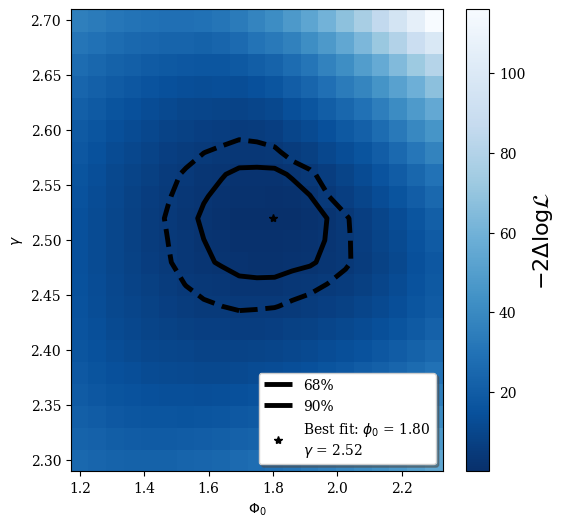

In [27]:
# 2d

# heatmap ll and contour
levels = [2.27, 4.60]  # 50% 2.3 1sigma (68%), 5.99 2sigma (95%)
levlabels = ["68%", "90%"]

linestyles = ["-","--"]

fig, (ax) = plt.subplots(1, 1)

ll, lh = [], []

name = "SPL_2D" # 
best_fit = scan_dict[name].get_freefit(drop_unsuccessful="True")

colors = ["black"] # black red


cntr = ax.contour( x[name], y[name], dllh[name], 
                levels=levels, colors=colors, linewidths=3.5, linestyles = linestyles )

pcm = ax.pcolor(x[name], 
                y[name], 
                dllh[name],
                cmap='Blues_r', shading='auto')

cbar = fig.colorbar(pcm, ax=ax)
cbar.set_label(label=r'$-2\Delta\mathrm{log}\mathcal{L}$',size=16,fontfamily='serif')

# best fit
norm = best_fit['astro_norm']
gamma = best_fit['gamma_astro']

dot, = ax.plot([norm], [gamma], "*", color=colors[0])

# set the legend
h, _ = cntr.legend_elements()
for i in range(len(h)):
    lh.append(h[i]) # legend elements
    ll.append(f'{levlabels[i]}') # legend text

lh.append(dot)
ll.append("Best fit: " + r"$\phi_0$ = " + f"{norm:.2f}\n" + r"$\gamma$ = " + f"{gamma:.2f}")

ax.set_xlabel(r"$\Phi_0$")
ax.set_ylabel(r"$\gamma$")

l3 = ax.legend(lh,ll,loc = "lower right",
                ncols=1,frameon=True,fancybox=True,shadow=True)

# plt.savefig(f"/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/plots/output/best_fit/llscan_contour_bestfit_{name}.pdf")

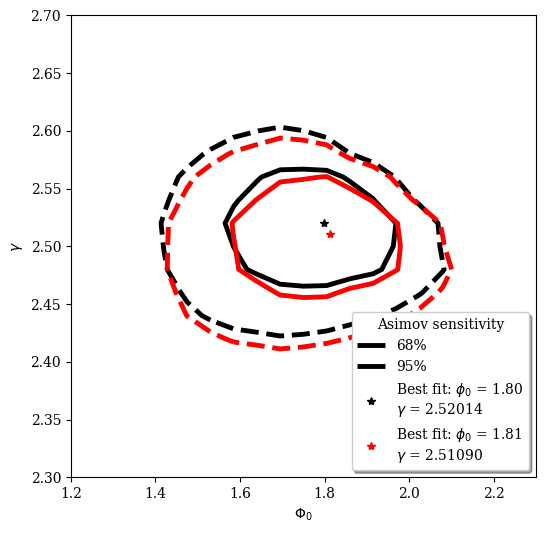

In [14]:
name1 = "SPL_2D"
name2 = "SPL_he_2D"

# name1 = "SPL_2D"
# name2 = "SPL_emptyICC_2D"

# name1 = "SPL_he_2D"
# name2 = "SPL_he_emptyICC_2D"


best_fit1 = scan_dict[name1].get_freefit(drop_unsuccessful="True")
norm1 = best_fit1['astro_norm']
gamma1 = best_fit1['gamma_astro']

best_fit2 = scan_dict[name2].get_freefit(drop_unsuccessful="True")
norm2 = best_fit2['astro_norm']
gamma2 = best_fit2['gamma_astro']

levels = [2.3,5.99]  # 50% 2.3 1sigma (68%), 5.99 2sigma (95%)
levlabels = ["68%", "95%"]

colors = ["black", "red", "black", "red"]
labels = ["Without HE", "With HE"]
linestyles = ["-","--"]

fig, (ax) = plt.subplots(1, 1)

ll, lh = [], []

cntr1 = ax.contour( x[name1], y[name1], dllh[name1], 
                levels=levels, colors=colors[0], linewidths=3.5, linestyles = linestyles )

cntr2 = ax.contour( x[name2], y[name2], dllh[name2], 
                levels=levels, colors=colors[1], linewidths=3.5, linestyles = linestyles )

# best fit
dot1, = ax.plot([norm1], [gamma1], "*", color=colors[0])

# best fit
dot2, = ax.plot([norm2], [gamma2], "*", color=colors[1])


# set the legend
h, _ = cntr1.legend_elements()
for i in range(len(h)):
    lh.append(h[i]) # legend elements
    ll.append(f'{levlabels[i]}') # legend text

lh.append(dot1)
ll.append("Best fit: " + r"$\phi_0$ = " + f"{norm1:.2f}\n" + r"$\gamma$ = " + f"{gamma1:.5f}")

lh.append(dot2)
ll.append("Best fit: " + r"$\phi_0$ = " + f"{norm2:.2f}\n" + r"$\gamma$ = " + f"{gamma2:.5f}")


ax.set_xlabel(r"$\Phi_0$")
ax.set_ylabel(r"$\gamma$")

l3 = ax.legend(lh,ll,loc = "lower right", title = "Asimov sensitivity",
                ncols=1,frameon=True,fancybox=True,shadow=True)

# plt.savefig(f"/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/plots/output/best_fit/compare_contour_bestfit_{name1}-{name2}.pdf")